Tinanic data set

The Titanic competition is a good way to introduce feature engineering and ensemble modeling. Firstly, I will display some feature analyses then i'll focus on the feature engineering. Last part concerns modeling and predicting the survival on the Titanic using an voting procedure. 

This script follows three main parts:

* **Feature analysis**  Data analysis, focusing on the relationship between features or between features and labels
* **Feature engineering** Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms
* **Modeling**

##Column Names
* PassengerId - ID od passenger 
* Survived - survied/died 
* Pclass -passenger class 
* Name -name of the passenger 
* Sex -sex of passenger 
* Age - age of passenger 
* SibSp-sibilings and spous 
* Parch -parents and children
* Ticket - ticket number 
* Fare- fare of the ticket 
* Cabin- cabin of the passenger 
* Embarked- aboard the titanic ship 

##Columns Added
* FirstName - Name column split 
* LastName - Name column split 
* Title -Title from Name Feature
* sex -Sex from the title



# Load Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from  collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/gdrive/My Drive/Colab_Notebooks/Data/titanic_data.csv')

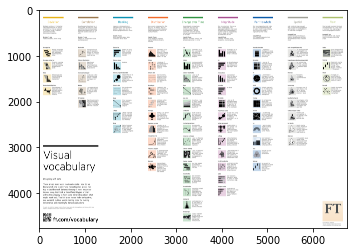

In [ ]:
plt.imshow(mpimg.imread('/content/gdrive/My Drive/SKILLATHON (DATA SCIENCE)/p64.png'))

# Basic Analysis

In [ ]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
476,477,0,2,"Renouf, Mr. Peter Henry",male,34.0,1,0,31027,21.00,NaN,S
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.60,NaN,C
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.00,B102,S
470,471,0,3,"Keefe, Mr. Arthur",male,NaN,0,0,323592,7.25,NaN,S
320,321,0,3,"Dennis, Mr. Samuel",male,22.0,0,0,A/5 21172,7.25,NaN,S


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Outlier Detection

In [ ]:
def detect_outliers(df,n,features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices) 
    #print(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers   
# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(df,2,["Pclass","Age","SibSp","Parch","Fare",])

In [ ]:
df.loc[Outliers_to_drop]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [ ]:
df = df.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [ ]:
df.shape

(881, 12)

## NULL values

In [ ]:
df = df.fillna(np.nan)

In [ ]:
for i in df:
   print(i,df[i].isnull().any(), df[i].isna().sum())

PassengerId False 0
Survived False 0
Pclass False 0
Name False 0
Sex False 0
Age True 170
SibSp False 0
Parch False 0
Ticket False 0
Fare False 0
Cabin True 680
Embarked True 2


## Duplicates

In [ ]:
if (df.duplicated(subset=None, keep='first').all())== True:
   print('Duplicates exist')
else:
  print('No Dupicates present')

No Dupicates present


# Feature Analysis

### PassengerId

In [ ]:
 if df.duplicated(subset='PassengerId', keep='first').all()==True:
   print('Duplicates present')
 else:
   print('No Duplicates') 

No Duplicates


In [ ]:
df['PassengerId'].value_counts()

891    1
294    1
305    1
304    1
303    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 881, dtype: int64

### Servived

In [ ]:
df["Survived"].describe()

count    881.000000
mean       0.385925
std        0.487090
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [ ]:
df['Survived'].sample(5)

14     0
592    1
795    1
42     1
378    0
Name: Survived, dtype: int64

In [ ]:
df['Survived'].value_counts()

0    541
1    340
Name: Survived, dtype: int64

### pclass

In [ ]:
df["Pclass"].describe()

count    881.000000
mean       2.307605
std        0.835055
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

In [ ]:
df['Pclass'].value_counts()

3    484
1    213
2    184
Name: Pclass, dtype: int64

In [ ]:
df['Pclass'].isna().any()

False

### Age

In [ ]:
df["Age"].describe()

count    711.000000
mean      29.731603
std       14.547835
min        0.420000
25%       20.250000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
print("NAN values in Age Feature :",df['Age'].isna().sum(),df['Age'].isnull().any())
print("mean of Age befor changing to median",df['Age'].mean())

NAN values in Age Feature : 170 True
mean of Age befor changing to median 29.731603375527424


In [ ]:
df.groupby(["Sex","Pclass"]).Age.mean()

Sex     Pclass
female  1         34.879518
        2         28.722973
        3         21.750000
male    1         41.504200
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [ ]:
index = df['Age'].index[df['Age'].apply(np.isnan)]

In [ ]:
index

Int64Index([  5,  17,  19,  26,  27,  28,  30,  31,  35,  41,
            ...
            818, 820, 824, 829, 831, 840, 850, 858, 868, 878],
           dtype='int64', length=170)

In [ ]:
df[df["Survived"]==1].groupby("Sex")['Pclass'].count()

Sex
female    231
male      109
Name: Pclass, dtype: int64

In [ ]:
df.groupby('Sex')['Age'].apply(lambda x: (x==24).sum())

Sex
female    15
male      14
Name: Age, dtype: int64

In [ ]:
df[(df["Survived"]==1)&(df["Sex"]=="Female")].groupby("Pclass")['Age'].count()

Series([], Name: Age, dtype: int64)

In [ ]:
df.groupby(["Sex","Pclass"])["Age"].median()

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         41.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [ ]:
df["Age"]=df['Age'].fillna(0)
df["Age"].loc[df["Age"]==0]

5      0.0
17     0.0
19     0.0
26     0.0
27     0.0
      ... 
840    0.0
850    0.0
858    0.0
868    0.0
878    0.0
Name: Age, Length: 170, dtype: float64

In [ ]:
print("NAN values  changed varification in Age Feature :",df['Age'].isna().sum(),df['Age'].isnull().any())
print("mean of Age after changing to median",df['Age'].mean())

NAN values  changed varification in Age Feature : 0 False
mean of Age after changing to median 23.994517593643586


In [ ]:
df.loc[(df['Age']==0),"Age"]=df['Age'].median()

In [ ]:
df['Age'].value_counts()

24.00    199
22.00     27
18.00     26
30.00     25
28.00     25
        ... 
12.00      1
36.50      1
55.50      1
20.50      1
0.42       1
Name: Age, Length: 88, dtype: int64

In [ ]:
category = pd.cut(df.Age,bins=[0,2,17,65,99],labels=['Toddler','Child','Adult','Elderly'])
df.insert(6,'Age Group',category)

In [ ]:
print(min(df.Age),max(df.Age))

0.42 80.0


### Sex

In [ ]:
df["Sex"].describe()

count      881
unique       2
top       male
freq       572
Name: Sex, dtype: object

In [ ]:
df["Sex"].value_counts()

male      572
female    309
Name: Sex, dtype: int64

In [ ]:
df["Sex"]=df["Sex"].replace(["male","female"],["Male","Female"])

### Name

In [ ]:
df["Name"].describe()

count                           881
unique                          881
top       del Carlo, Mr. Sebastiano
freq                              1
Name: Name, dtype: object

In [ ]:
df["Name"].sample()

115    Turpin, Mr. William John Robert
Name: Name, dtype: object

In [ ]:
Name=df["Name"].str.split(",", n = 1, expand = True) 
df["FirstName"]=Name[1]
df["LastName"]=Name[0]

In [ ]:
print("null values in the LastName Feature",df["LastName"].isnull().any())
print("null values in the First Feature",df["FirstName"].isnull().any())

null values in the LastName Feature False
null values in the First Feature False


In [ ]:
df["Title"]=[i.split(".")[0].split(",")[1].strip() for i in df["Name"]]

In [ ]:
df["Title"].value_counts()

Mr              513
Miss            177
Mrs             125
Master           39
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Ms                1
the Countess      1
Capt              1
Jonkheer          1
Mme               1
Sir               1
Lady              1
Don               1
Name: Title, dtype: int64

In [ ]:
df["Title"] = df["Title"].replace([ "Master",'Dr','Rev','Major','Mlle','Capt', 'Col','Jonkheer', 'Don', 'the Countess', 'Sir'], 'Mr')
df["Title"] = df["Title"].replace(['Lady', 'Ms','Mme','Mrs'], 'Miss')

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Age Group,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstName,LastName,Title
0,1,0,3,"Braund, Mr. Owen Harris",Male,22.0,Adult,1,0,A/5 21171,7.2500,NaN,S,Mr. Owen Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,Adult,1,0,PC 17599,71.2833,C85,C,Mrs. John Bradley (Florence Briggs Thayer),Cumings,Miss
2,3,1,3,"Heikkinen, Miss. Laina",Female,26.0,Adult,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss. Laina,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,Adult,1,0,113803,53.1000,C123,S,Mrs. Jacques Heath (Lily May Peel),Futrelle,Miss
4,5,0,3,"Allen, Mr. William Henry",Male,35.0,Adult,0,0,373450,8.0500,NaN,S,Mr. William Henry,Allen,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,887,0,2,"Montvila, Rev. Juozas",Male,27.0,Adult,0,0,211536,13.0000,NaN,S,Rev. Juozas,Montvila,Mr
877,888,1,1,"Graham, Miss. Margaret Edith",Female,19.0,Adult,0,0,112053,30.0000,B42,S,Miss. Margaret Edith,Graham,Miss
878,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",Female,24.0,Adult,1,2,W./C. 6607,23.4500,NaN,S,"Miss. Catherine Helen ""Carrie""",Johnston,Miss
879,890,1,1,"Behr, Mr. Karl Howell",Male,26.0,Adult,0,0,111369,30.0000,C148,C,Mr. Karl Howell,Behr,Mr


In [ ]:
df["Title"].value_counts()


Mr      576
Miss    305
Name: Title, dtype: int64

In [ ]:
df["sex"]=df["Title"].replace(["Mr","Miss"],["Male","Female"])

In [ ]:
df["sex"].value_counts()

Male      576
Female    305
Name: sex, dtype: int64

In [ ]:
if df["Sex"].all()==df["sex"].all():
  print("both are equal")
else:
    print("not equal")

both are equal


### sibSp

In [ ]:
df["SibSp"].describe()

count    881.000000
mean       0.455165
std        0.871571
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        5.000000
Name: SibSp, dtype: float64

In [ ]:
df.groupby(["Sex","SibSp"]).Age.median()

Sex     SibSp
Female  0        24.0
        1        28.0
        2        18.0
        3        24.0
        4         7.5
        5        16.0
Male    0        25.0
        1        28.0
        2        24.0
        3         7.0
        4         5.5
        5        10.0
Name: Age, dtype: float64

In [ ]:
df["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     13
5      5
Name: SibSp, dtype: int64

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Age Group,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstName,LastName,Title,sex
0,1,0,3,"Braund, Mr. Owen Harris",Male,22.0,Adult,1,0,A/5 21171,7.2500,NaN,S,Mr. Owen Harris,Braund,Mr,Male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,Adult,1,0,PC 17599,71.2833,C85,C,Mrs. John Bradley (Florence Briggs Thayer),Cumings,Miss,Female
2,3,1,3,"Heikkinen, Miss. Laina",Female,26.0,Adult,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss. Laina,Heikkinen,Miss,Female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,Adult,1,0,113803,53.1000,C123,S,Mrs. Jacques Heath (Lily May Peel),Futrelle,Miss,Female
4,5,0,3,"Allen, Mr. William Henry",Male,35.0,Adult,0,0,373450,8.0500,NaN,S,Mr. William Henry,Allen,Mr,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,887,0,2,"Montvila, Rev. Juozas",Male,27.0,Adult,0,0,211536,13.0000,NaN,S,Rev. Juozas,Montvila,Mr,Male
877,888,1,1,"Graham, Miss. Margaret Edith",Female,19.0,Adult,0,0,112053,30.0000,B42,S,Miss. Margaret Edith,Graham,Miss,Female
878,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",Female,24.0,Adult,1,2,W./C. 6607,23.4500,NaN,S,"Miss. Catherine Helen ""Carrie""",Johnston,Miss,Female
879,890,1,1,"Behr, Mr. Karl Howell",Male,26.0,Adult,0,0,111369,30.0000,C148,C,Mr. Karl Howell,Behr,Mr,Male


In [ ]:
print("null values in SibSp :",df["SibSp"].isnull().any(),df["SibSp"].isna().sum())

null values in SibSp : False 0


### Parch

In [ ]:
df["Parch"].describe()

count    881.000000
mean       0.363224
std        0.791839
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [ ]:
print("Null value is Parch", df["Parch"].isna().sum())

Null value is Parch 0


In [ ]:
sum(df["Parch"].value_counts())

881

In [ ]:
df.groupby(["sex","Parch"]).Age.median()

sex     Parch
Female  0        24.0
        1        24.5
        2        18.5
        3        36.0
        4        37.0
        5        39.0
        6        43.0
Male    0        25.5
        1        20.5
        2        10.5
        3        16.0
        4        52.0
        5        39.0
Name: Age, dtype: float64

### Ticket

In [ ]:
df["Ticket"].describe()

count        881
unique       680
top       347082
freq           7
Name: Ticket, dtype: object

In [ ]:
sum(df["Ticket"].value_counts())

881

In [ ]:
print("Null value is Ticket", df["Ticket"].isna().sum())

Null value is Ticket 0


### Fare

In [ ]:
df["Fare"].describe()

count    881.000000
mean      31.121566
std       47.996249
min        0.000000
25%        7.895800
50%       14.454200
75%       30.500000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
df.groupby(["Pclass"]).Fare.median()

Pclass
1    57.9792
2    14.2500
3     8.0500
Name: Fare, dtype: float64

In [ ]:
print("NUll values in Fare column :",df["Fare"].isna().sum())

NUll values in Fare column : 0


In [ ]:
df["Fare"].describe()

count    881.000000
mean      31.121566
std       47.996249
min        0.000000
25%        7.895800
50%       14.454200
75%       30.500000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
df.loc[(df.Fare == 0) &(df.Pclass==1), ("Fare")] = 57.9792
df.loc[(df.Fare == 0) &(df.Pclass==2), ("Fare")] = 14.2500
df.loc[(df.Fare == 0) &(df.Pclass==3), ("Fare")] = 8.0500

In [ ]:
df.Fare.describe()

count    881.000000
mean      31.584217
std       47.910072
min        4.012500
25%        7.925000
50%       14.454200
75%       30.695800
max      512.329200
Name: Fare, dtype: float64

### Cabin

null values are set to X cabin

In [ ]:
df.Cabin.describe()

count     201
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

In [ ]:
df["Cabin"].value_counts()

G6         4
B96 B98    4
F2         3
E101       3
D          3
          ..
C99        1
T          1
B50        1
C50        1
A14        1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
df.Cabin.isnull().sum()

680

In [ ]:
df["New_Cabin"] = [x[0] for x in df['Cabin'].astype(str)]

In [ ]:
df.New_Cabin.value_counts()
print("Total number of Values",sum(df["New_Cabin"].value_counts()))

Total number of Values 881


In [ ]:
df.groupby(["New_Cabin"])["Sex"].get_group('n').count()

680

In [ ]:
df.groupby(["Survived","Sex","Pclass","New_Cabin"])["New_Cabin"].count()

Survived  Sex     Pclass  New_Cabin
0         Female  1       C              3
                  2       E              1
                          n              5
                  3       G              2
                          n             67
          Male    1       A              8
                          B             12
                          C             20
                          D              7
                          E              7
                          T              1
                          n             21
                  2       D              1
                          F              1
                          n             89
                  3       F              4
                          n            292
1         Female  1       A              1
                          B             27
                          C             22
                          D             16
                          E             10
                  

In [ ]:
df["New_Cabin"]=df["New_Cabin"].replace('n','X')

In [ ]:
df.New_Cabin.value_counts()

X    680
C     56
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: New_Cabin, dtype: int64

### Embarked

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Age Group',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FirstName',
       'LastName', 'Title', 'sex', 'New_Cabin'],
      dtype='object')

In [ ]:
df.Embarked.describe()

count     879
unique      3
top         S
freq      634
Name: Embarked, dtype: object

In [ ]:
print( df.Embarked.isnull().any() ,df.Embarked.isnull().sum() )

True 2


In [ ]:
df["Embarked"]=df["Embarked"].fillna('S')

In [ ]:
df.Embarked.value_counts()

S    636
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df.Embarked.isna().sum()

0

#  EDA

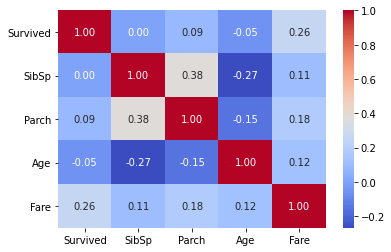

In [ ]:
g = sns.heatmap(df[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

### Survived

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


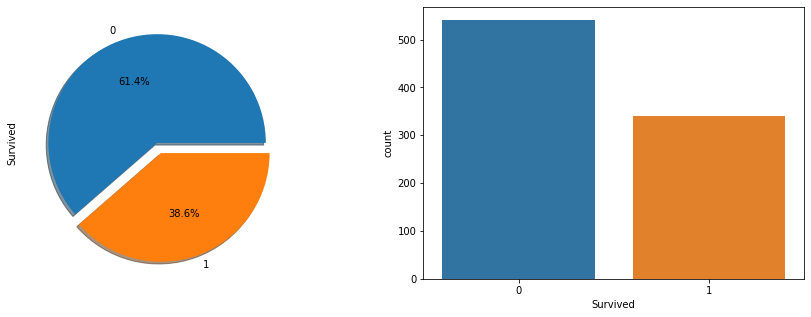

In [ ]:
f,ax=plt.subplots(1,2,figsize=(15,5))
df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
sns.countplot('Survived',data=df,ax=ax[1])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


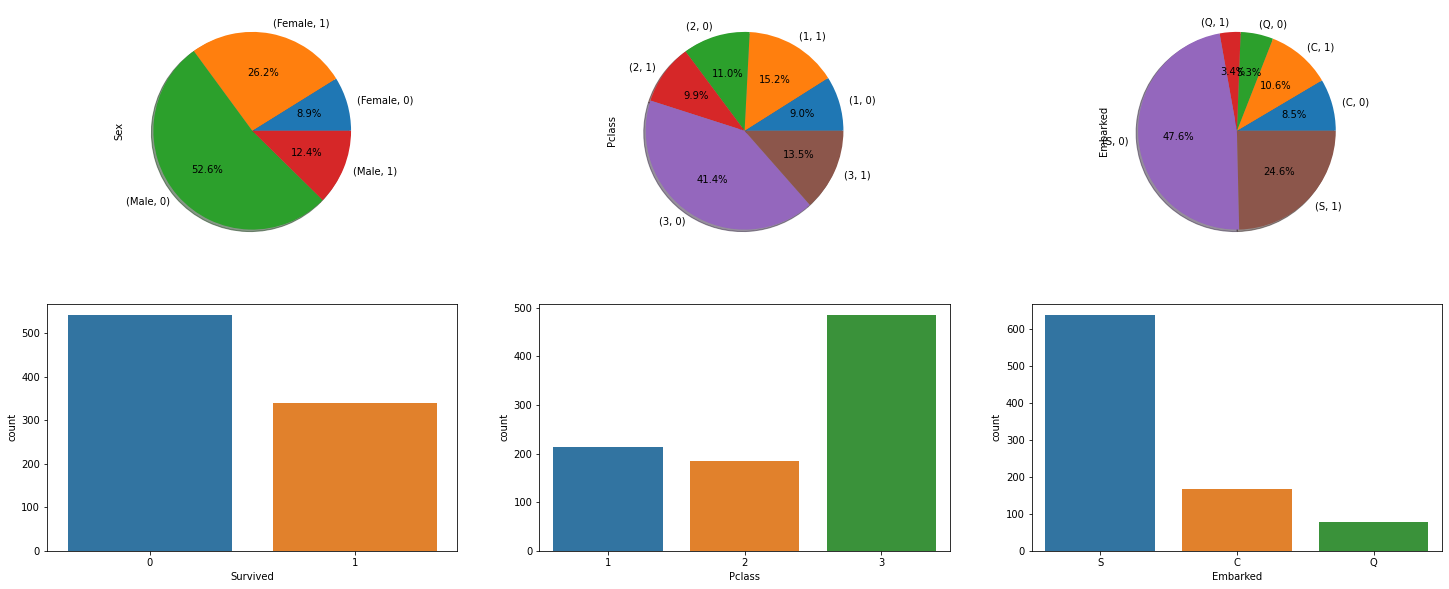

In [ ]:
f,ax=plt.subplots(2,3,figsize=(25,10))
df.groupby(['Sex','Survived'])["Sex"].count().plot.pie(autopct='%1.1f%%',ax=ax[0,0],shadow=True)
df.groupby(['Pclass','Survived'])["Pclass"].count().plot.pie(autopct='%1.1f%%',ax=ax[0,1],shadow=True)
df.groupby(['Embarked','Survived'])["Embarked"].count().plot.pie(autopct='%1.1f%%',ax=ax[0,2],shadow=True)
sns.countplot('Survived',data=df,ax=ax[1,0])
sns.countplot('Pclass',data=df,ax=ax[1,1])
sns.countplot('Embarked',data=df,ax=ax[1,2])
plt.show()

### Sex

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


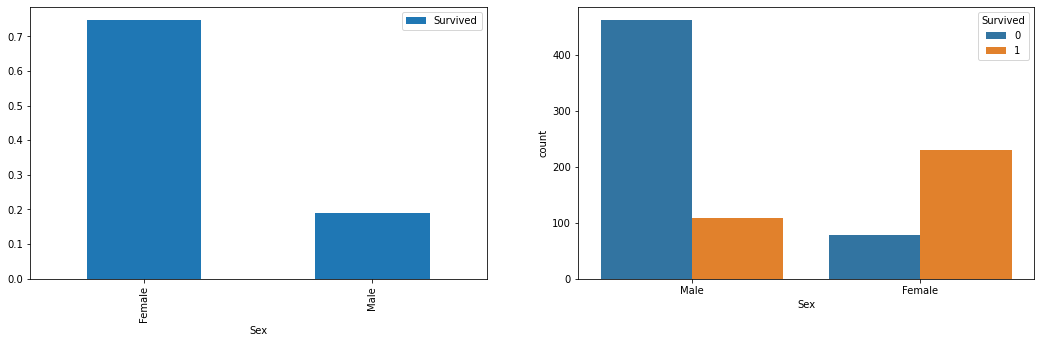

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,5))
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
sns.countplot('Sex',hue='Survived',data=df,ax=ax[1])

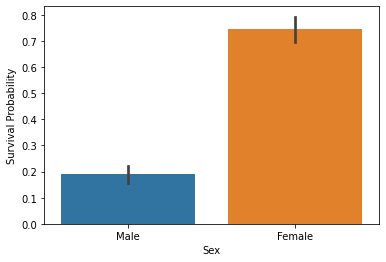

In [ ]:
g = sns.barplot(x="Sex",y="Survived",data=df)
g = g.set_ylabel("Survival Probability")

### Pclass

In [ ]:
pd.crosstab(df.Pclass,df.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,79,134,213
2,97,87,184
3,365,119,484
All,541,340,881


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


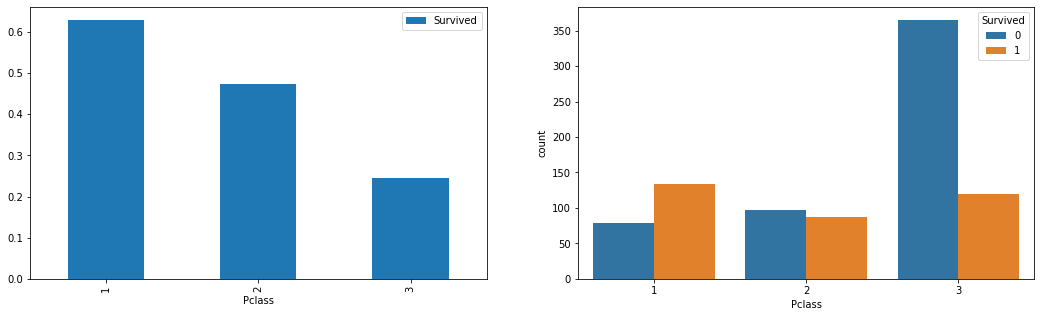

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,5))
df[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[0])
sns.countplot('Pclass',hue='Survived',data=df,ax=ax[1])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


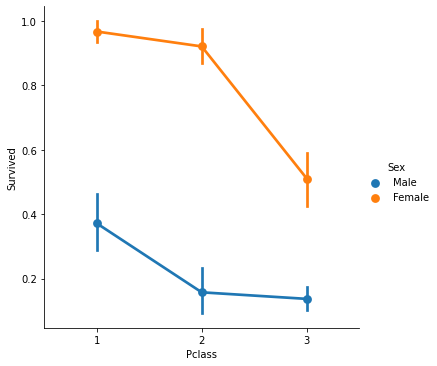

In [ ]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df)
plt.show()

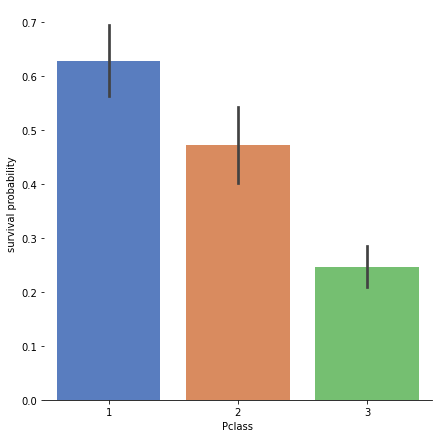

In [ ]:
g = sns.catplot(x="Pclass",y="Survived",data=df,kind="bar", height = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

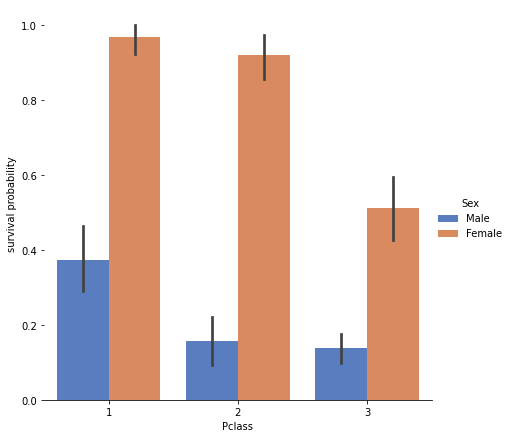

In [ ]:
# Explore Pclass vs Survived by Sex
g = sns.catplot(x="Pclass", y="Survived", hue="Sex", data=df,
                   height=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

### Age

In [ ]:
df.loc[df['Age']<0]

,PassengerId,Survived,Pclass,Name,Sex,Age,Age Group,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstName,LastName,Title,sex,New_Cabin


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


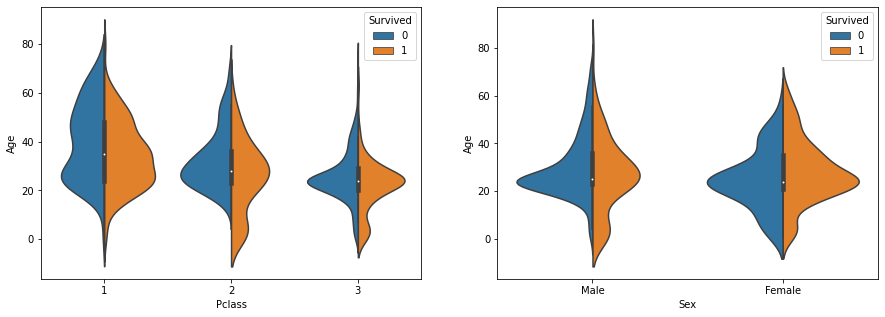

In [ ]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.violinplot("Pclass","Age", hue="Survived", data=df,split=True,ax=ax[0])
sns.violinplot("Sex","Age", hue="Survived", data=df,split=True,ax=ax[1])

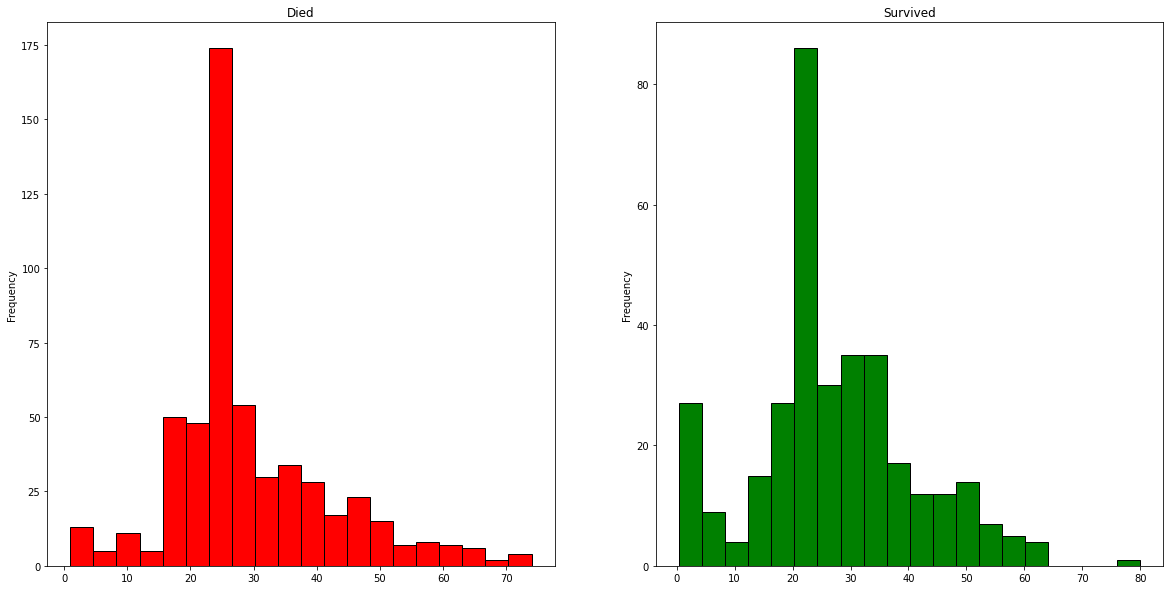

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
df[df['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Died')
df[df['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


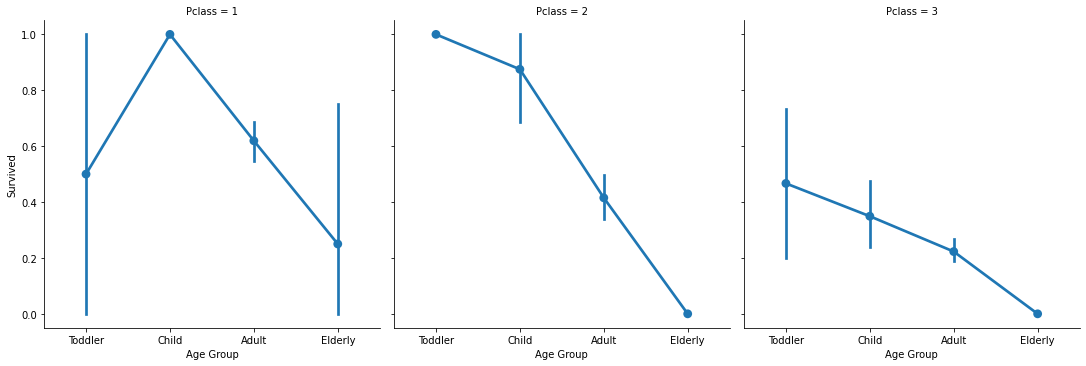

In [ ]:
sns.factorplot('Age Group','Survived',data=df,col='Pclass')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


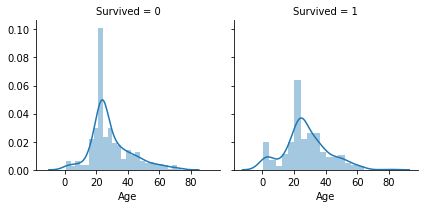

In [ ]:
# Explore Age vs Survived
g = sns.FacetGrid(df, col='Survived')
g = g.map(sns.distplot, "Age")

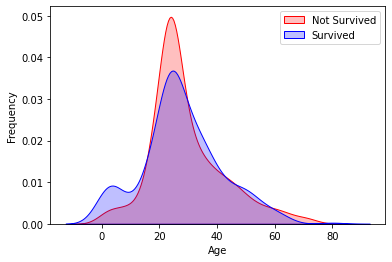

In [ ]:
g = sns.kdeplot(df["Age"][(df["Survived"] == 0) & (df["Age"].notnull())], color="Red", shade = True)
g = sns.kdeplot(df["Age"][(df["Survived"] == 1) & (df["Age"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

### Embarked

In [ ]:
pd.crosstab([df.Embarked,df.Pclass],[df.Sex,df.Survived],margins=True).style.background_gradient(cmap='summer_r')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


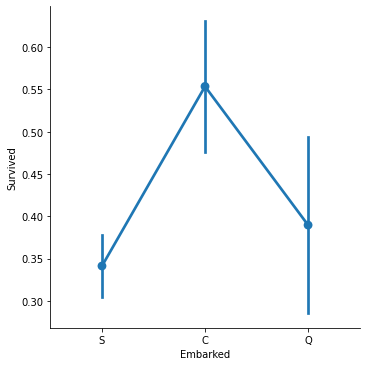

In [ ]:
sns.factorplot('Embarked','Survived',data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

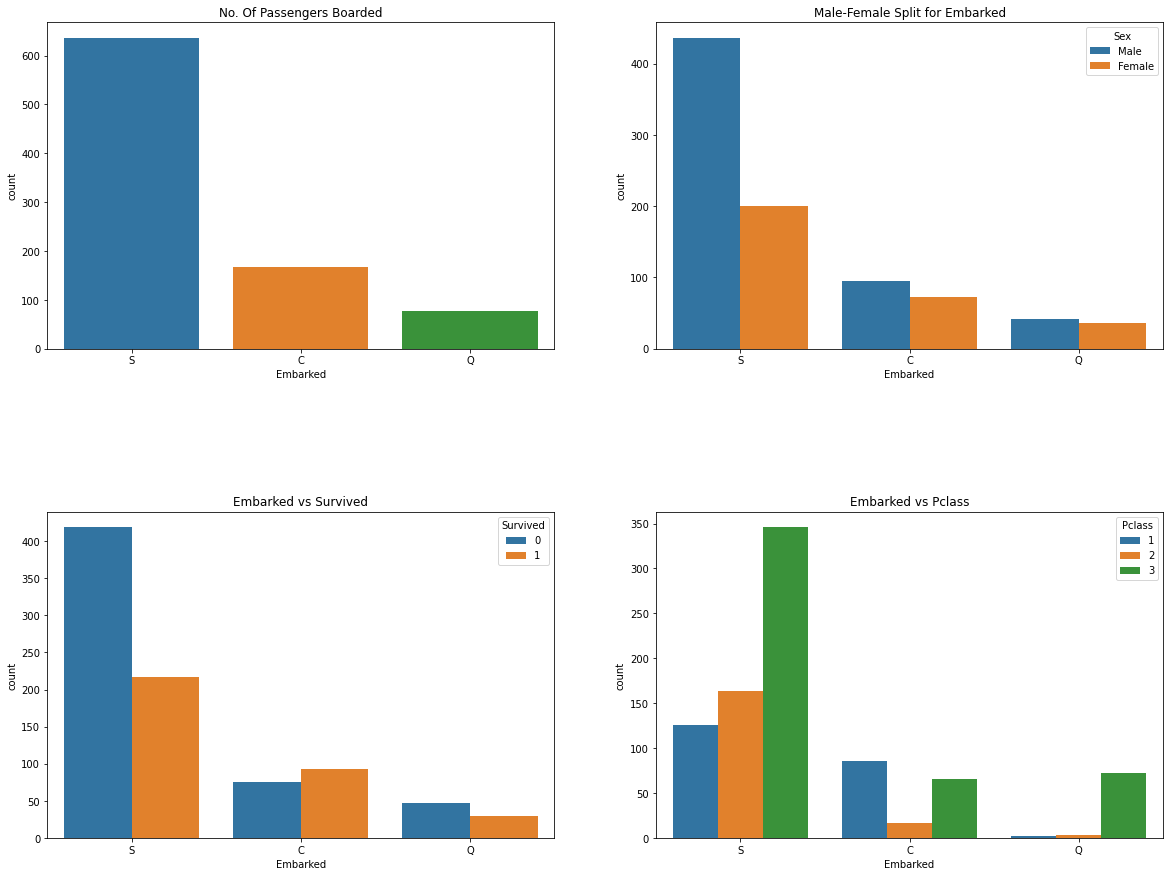

In [ ]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=  df,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=df,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=df,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=df,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


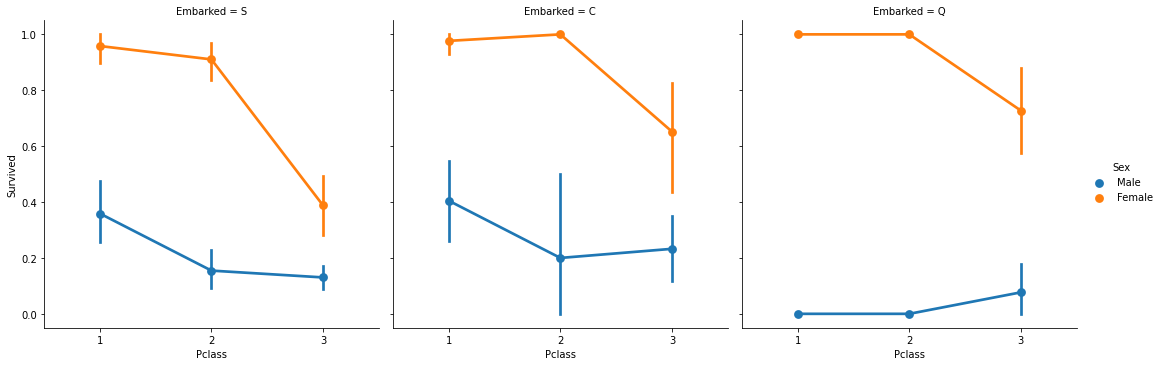

In [ ]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=df)

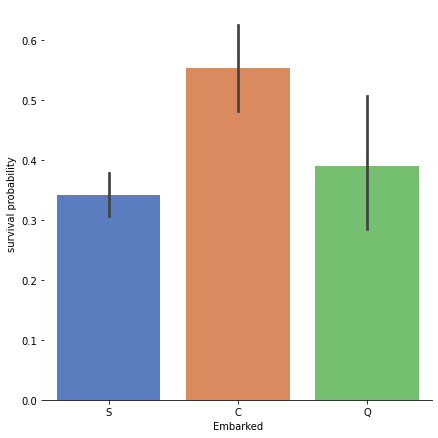

In [ ]:
# Explore Embarked vs Survived 
g = sns.catplot(x="Embarked", y="Survived",  data=df,
                   height=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

### SibSp

In [ ]:
pd.crosstab([df.SibSp],df.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,11,2
4,15,3
5,5,0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'SibSp vs Survived')

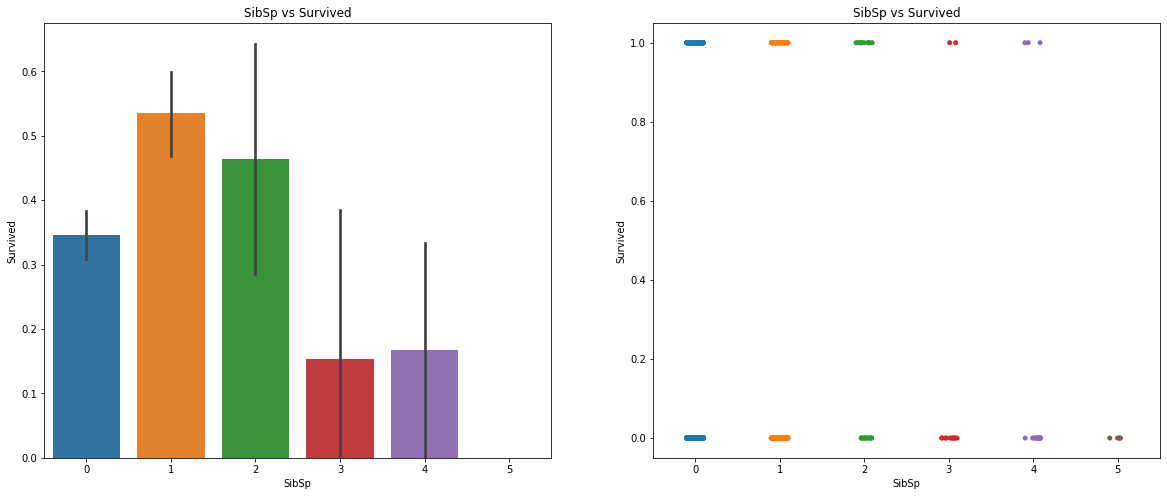

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=df,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.stripplot('SibSp','Survived',data=df,ax=ax[1])
ax[1].set_title('SibSp vs Survived')

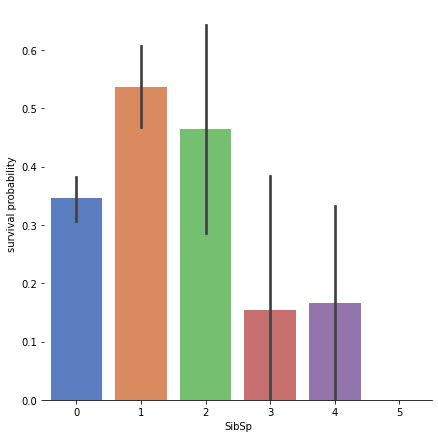

In [ ]:
# Explore SibSp feature vs Survived
g = sns.catplot(x="SibSp",y="Survived",data=df,kind="bar", height = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

### Parch

In [ ]:
pd.crosstab([df.Parch],df.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
Parch,,
0,445,233
1,53,65
2,32,38
3,2,3
4,4,0
5,4,1
6,1,0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


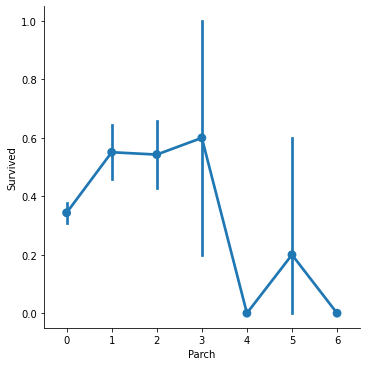

In [ ]:
sns.factorplot('Parch','Survived',data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


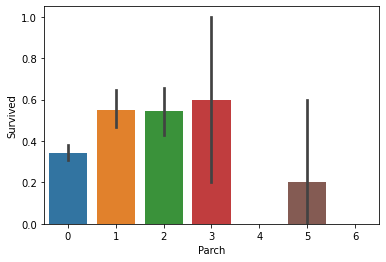

In [ ]:
sns.barplot('Parch','Survived',data=df)

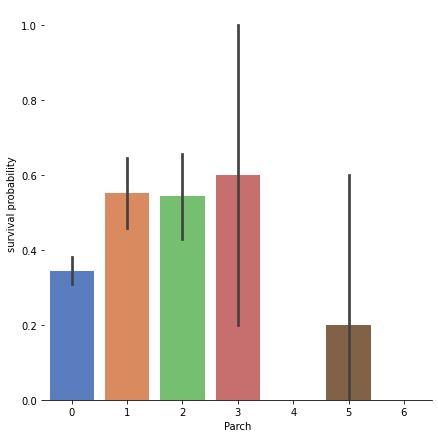

In [ ]:
# Explore Parch feature vs Survived
g  = sns.catplot(x="Parch",y="Survived",data=df,kind="bar", height = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

### Fare

In [ ]:
pd.crosstab([df.Fare.sum()],df.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
row_0,,
27825.6953,541,340


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


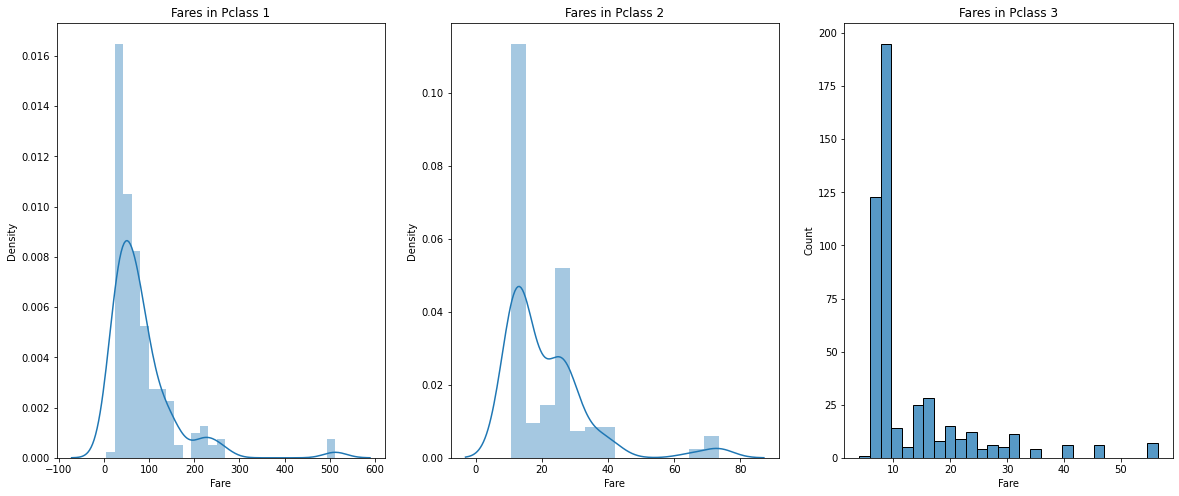

In [ ]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(df[df['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(df[df['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.histplot(df[df['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


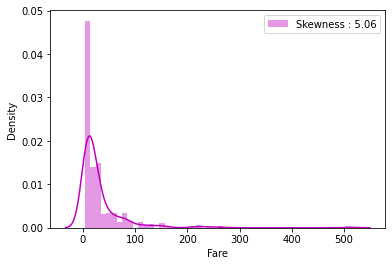

In [ ]:
g = sns.distplot(df["Fare"], color="m", label="Skewness : %.2f"%(df["Fare"].skew()))
g = g.legend(loc="best")

In [ ]:
df["Fare"] = df["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


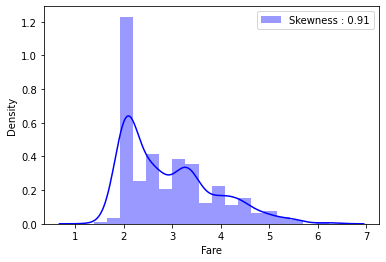

In [ ]:
g = sns.distplot(df["Fare"], color="b", label="Skewness : %.2f"%(df["Fare"].skew()))
g = g.legend(loc="best")

# **Observation**
Observations in a Nutshell for all features:

**Sex**: The chance of survival for women is high as compared to men.

**Pclass**:There is a visible trend that being a 1st class passenger gives you better chances of survival. The survival rate for Pclass3 is very low. For women, the chance of survival from Pclass1 is almost 1 and is high too for those from Pclass2. Money Wins!!!.

**Age**: Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

**Embarked**: This is a very interesting feature. The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S. Passengers at Q were all from Pclass3.

**Parch**+**SibSp**: Having 1-2 siblings,spouse on board or 1-3 Parents shows a greater chance of probablity rather than being alone or having a large family travelling with you.

# Feature Engineering

### Corelation

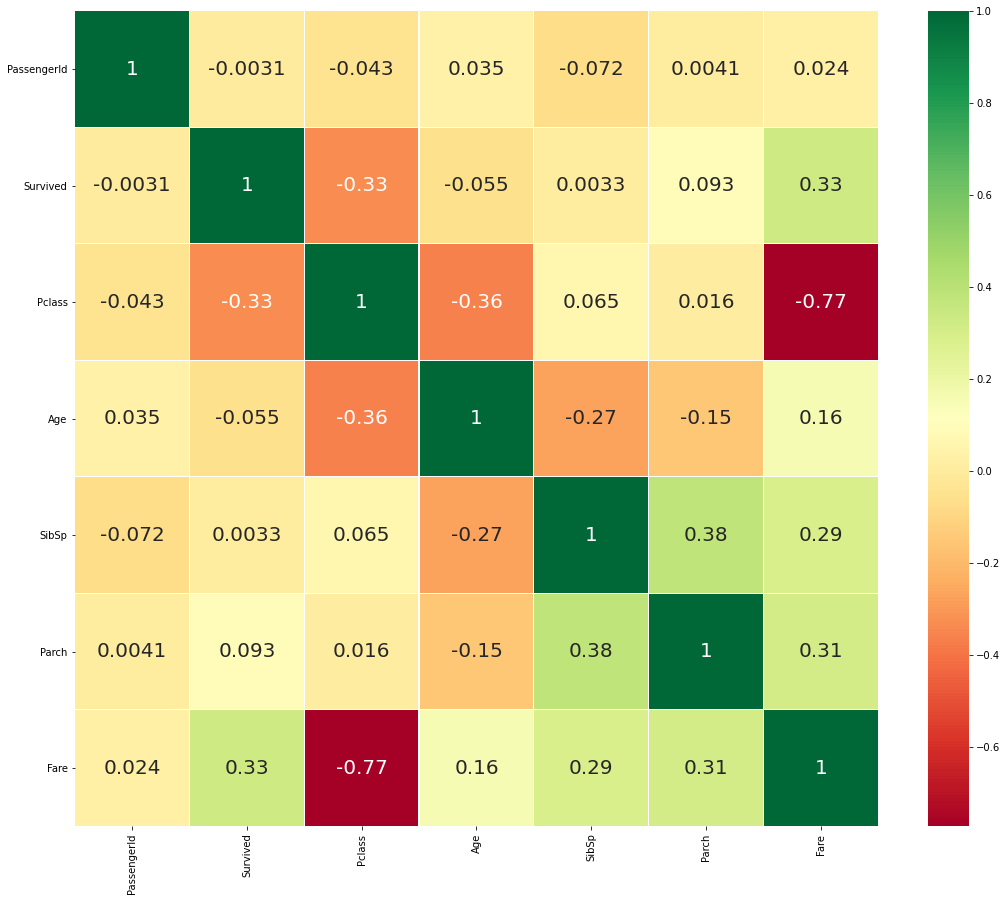

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)

### Fare_Range

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Age Group,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstName,LastName,Title,sex,New_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",Male,22.0,Adult,1,0,A/5 21171,1.981001,NaN,S,Mr. Owen Harris,Braund,Mr,Male,X
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,Adult,1,0,PC 17599,4.266662,C85,C,Mrs. John Bradley (Florence Briggs Thayer),Cumings,Miss,Female,C
2,3,1,3,"Heikkinen, Miss. Laina",Female,26.0,Adult,0,0,STON/O2. 3101282,2.070022,NaN,S,Miss. Laina,Heikkinen,Miss,Female,X
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,Adult,1,0,113803,3.972177,C123,S,Mrs. Jacques Heath (Lily May Peel),Futrelle,Miss,Female,C
4,5,0,3,"Allen, Mr. William Henry",Male,35.0,Adult,0,0,373450,2.085672,NaN,S,Mr. William Henry,Allen,Mr,Male,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,887,0,2,"Montvila, Rev. Juozas",Male,27.0,Adult,0,0,211536,2.564949,NaN,S,Rev. Juozas,Montvila,Mr,Male,X
877,888,1,1,"Graham, Miss. Margaret Edith",Female,19.0,Adult,0,0,112053,3.401197,B42,S,Miss. Margaret Edith,Graham,Miss,Female,B
878,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",Female,24.0,Adult,1,2,W./C. 6607,3.154870,NaN,S,"Miss. Catherine Helen ""Carrie""",Johnston,Miss,Female,X
879,890,1,1,"Behr, Mr. Karl Howell",Male,26.0,Adult,0,0,111369,3.401197,C148,C,Mr. Karl Howell,Behr,Mr,Male,C


In [ ]:
df["Fare"].describe()

count    881.000000
mean       2.924620
std        0.919625
min        1.389414
25%        2.070022
50%        2.670985
75%        3.424126
max        6.238967
Name: Fare, dtype: float64

In [ ]:
df['Fare_Range']=pd.qcut(df['Fare'],4)
df.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(1.3880000000000001, 2.07]",0.225664
"(2.07, 2.671]",0.282407
"(2.671, 3.424]",0.452055
"(3.424, 6.239]",0.586364


In [ ]:
df['Fare_cat']=0
df.loc[df['Fare']<=1.388,'Fare_cat']=0
df.loc[(df['Fare']>2.07)&(df['Fare']<=2.671),'Fare_cat']=1
df.loc[(df['Fare']>2.671)&(df['Fare']<=3.424),'Fare_cat']=2
df.loc[(df['Fare']>3.424)&(df['Fare']<=6.239),'Fare_cat']=3

In [ ]:
df["Fare_cat"].value_counts()

1    234
3    222
2    217
0    208
Name: Fare_cat, dtype: int64

### **SibSp** + **Parch**

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,Age Group,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstName,LastName,Title,sex,New_Cabin,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",Male,22.0,Adult,1,0,A/5 21171,1.981001,NaN,S,Mr. Owen Harris,Braund,Mr,Male,X,"(1.3880000000000001, 2.07]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,Adult,1,0,PC 17599,4.266662,C85,C,Mrs. John Bradley (Florence Briggs Thayer),Cumings,Miss,Female,C,"(3.424, 6.239]",3
2,3,1,3,"Heikkinen, Miss. Laina",Female,26.0,Adult,0,0,STON/O2. 3101282,2.070022,NaN,S,Miss. Laina,Heikkinen,Miss,Female,X,"(1.3880000000000001, 2.07]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,Adult,1,0,113803,3.972177,C123,S,Mrs. Jacques Heath (Lily May Peel),Futrelle,Miss,Female,C,"(3.424, 6.239]",3
4,5,0,3,"Allen, Mr. William Henry",Male,35.0,Adult,0,0,373450,2.085672,NaN,S,Mr. William Henry,Allen,Mr,Male,X,"(2.07, 2.671]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,887,0,2,"Montvila, Rev. Juozas",Male,27.0,Adult,0,0,211536,2.564949,NaN,S,Rev. Juozas,Montvila,Mr,Male,X,"(2.07, 2.671]",1
877,888,1,1,"Graham, Miss. Margaret Edith",Female,19.0,Adult,0,0,112053,3.401197,B42,S,Miss. Margaret Edith,Graham,Miss,Female,B,"(2.671, 3.424]",2
878,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",Female,24.0,Adult,1,2,W./C. 6607,3.154870,NaN,S,"Miss. Catherine Helen ""Carrie""",Johnston,Miss,Female,X,"(2.671, 3.424]",2
879,890,1,1,"Behr, Mr. Karl Howell",Male,26.0,Adult,0,0,111369,3.401197,C148,C,Mr. Karl Howell,Behr,Mr,Male,C,"(2.671, 3.424]",2


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try pointplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplo

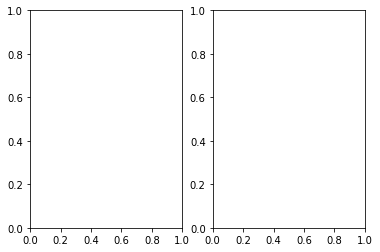

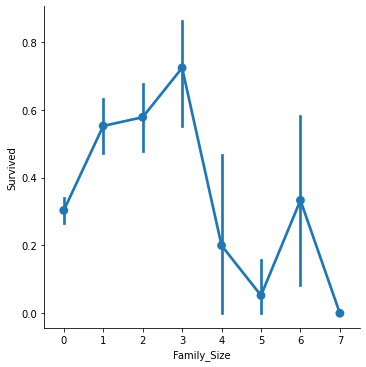

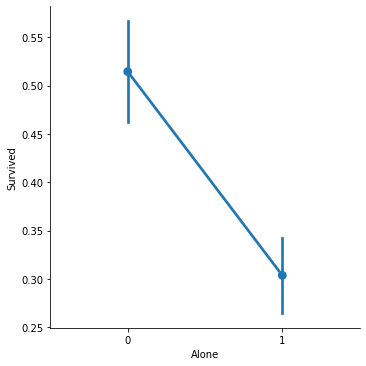

In [ ]:
df['Family_Size']=0
df['Family_Size']=df['Parch']+df['SibSp']#family size
df['Alone']=0
df.loc[df.Family_Size==0,'Alone']=1#Alone
f,ax=plt.subplots(1,2)
sns.factorplot('Family_Size','Survived',data=df,ax=ax[0])
sns.factorplot('Alone','Survived',data=df,ax=ax[1])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


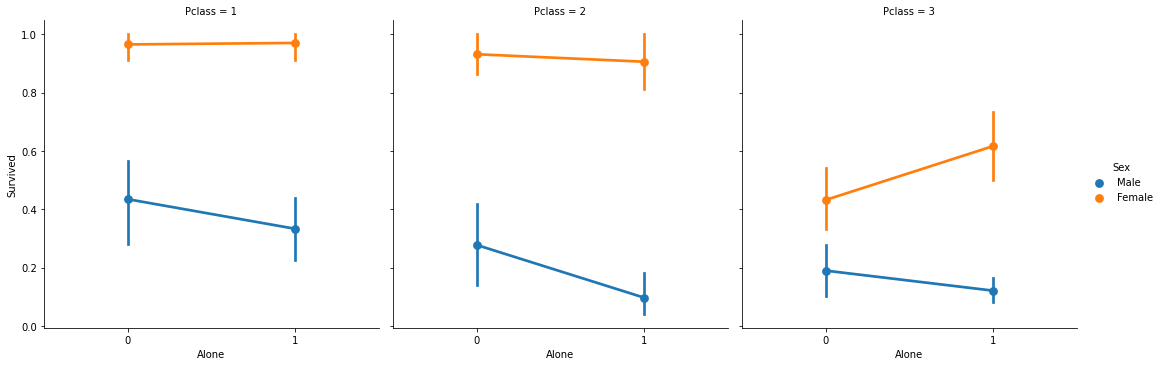

In [ ]:
sns.factorplot('Alone','Survived',data=df,hue='Sex',col='Pclass')


Interpreting The Heatmap
The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly correlation is.

POSITIVE CORRELATION: If an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.

NEGATIVE CORRELATION: If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.

Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

So do you think we should use both of them as one of them is redundant. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now from the above heatmap,we can see that the features are not much correlated. The highest correlation is between SibSp and Parch i.e 0.41. So we can carry on with all features.

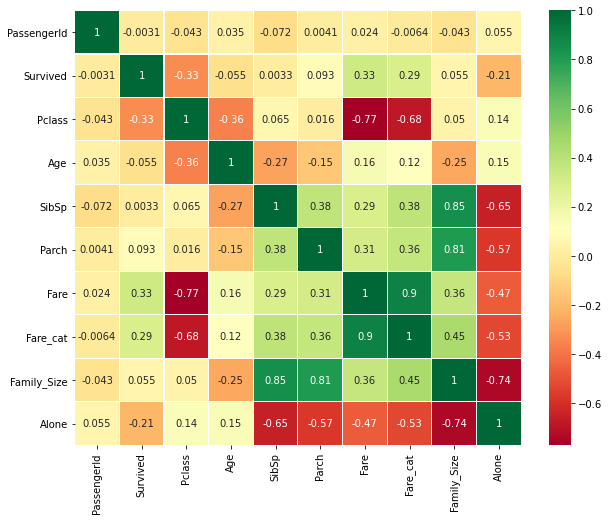

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)

# Dummies(catogorical to numaric)

### Droping columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  881 non-null    int64   
 1   Survived     881 non-null    int64   
 2   Pclass       881 non-null    int64   
 3   Name         881 non-null    object  
 4   Sex          881 non-null    object  
 5   Age          881 non-null    float64 
 6   Age Group    881 non-null    category
 7   SibSp        881 non-null    int64   
 8   Parch        881 non-null    int64   
 9   Ticket       881 non-null    object  
 10  Fare         881 non-null    float64 
 11  Cabin        201 non-null    object  
 12  Embarked     881 non-null    object  
 13  FirstName    881 non-null    object  
 14  LastName     881 non-null    object  
 15  Title        881 non-null    object  
 16  sex          881 non-null    object  
 17  New_Cabin    881 non-null    object  
 18  Fare_Range   881 non-null    c

In [ ]:
df_drop=df.drop(["PassengerId","FirstName","LastName","Fare","Ticket","Age","Name","Cabin","sex","Fare_Range","SibSp","Parch"],axis = 1).reset_index(drop=True)

In [ ]:
df_drop

,Survived,Pclass,Sex,Age Group,Embarked,Title,New_Cabin,Fare_cat,Family_Size,Alone
0,0,3,Male,Adult,S,Mr,X,0,1,0
1,1,1,Female,Adult,C,Miss,C,3,1,0
2,1,3,Female,Adult,S,Miss,X,1,0,1
3,1,1,Female,Adult,S,Miss,C,3,1,0
4,0,3,Male,Adult,S,Mr,X,1,0,1
...,...,...,...,...,...,...,...,...,...,...
876,0,2,Male,Adult,S,Mr,X,1,0,1
877,1,1,Female,Adult,S,Miss,B,2,0,1
878,0,3,Female,Adult,S,Miss,X,2,3,0
879,1,1,Male,Adult,C,Mr,C,2,0,1


### get_dummies

In [ ]:
df_drop.head()

,Survived,Pclass,Sex,Age Group,Embarked,Title,New_Cabin,Fare_cat,Family_Size,Alone
0,0,3,Male,Adult,S,Mr,X,0,1,0
1,1,1,Female,Adult,C,Miss,C,3,1,0
2,1,3,Female,Adult,S,Miss,X,1,0,1
3,1,1,Female,Adult,S,Miss,C,3,1,0
4,0,3,Male,Adult,S,Mr,X,1,0,1


In [ ]:
df_dummies = pd.get_dummies(df_drop, columns = ["Pclass","Age Group","Sex","Embarked","Title","New_Cabin","Family_Size","Fare_cat"])

In [ ]:
df_dummies.columns

Index(['Survived', 'Alone', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Age Group_Toddler', 'Age Group_Child', 'Age Group_Adult',
       'Age Group_Elderly', 'Sex_Female', 'Sex_Male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'New_Cabin_A',
       'New_Cabin_B', 'New_Cabin_C', 'New_Cabin_D', 'New_Cabin_E',
       'New_Cabin_F', 'New_Cabin_G', 'New_Cabin_T', 'New_Cabin_X',
       'Family_Size_0', 'Family_Size_1', 'Family_Size_2', 'Family_Size_3',
       'Family_Size_4', 'Family_Size_5', 'Family_Size_6', 'Family_Size_7',
       'Fare_cat_0', 'Fare_cat_1', 'Fare_cat_2', 'Fare_cat_3'],
      dtype='object')

In [ ]:
df_dummies.columns[(df_dummies == 0).all()]

Index([], dtype='object')

In [ ]:
df_dummies.columns[df_dummies.columns.duplicated()]

Index([], dtype='object')

# Dummies co-relaton

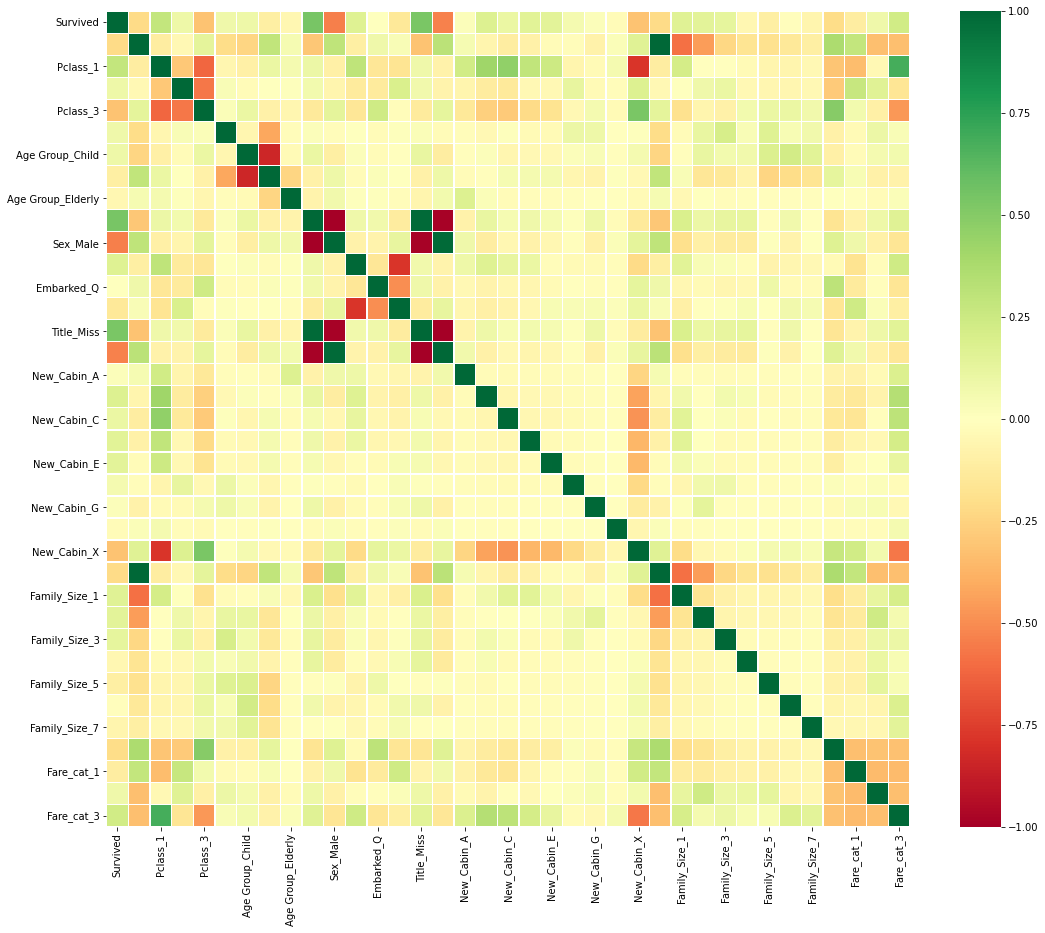

In [ ]:
sns.heatmap(df_dummies.corr(), cmap ='RdYlGn',linewidths = 0.30,annot_kws={'size':8}) 
fig=plt.gcf()
fig.set_size_inches(18,15)

# train_test split

In [ ]:
 from sklearn.model_selection import train_test_split

In [ ]:
X=df_dummies.drop("Survived",inplace=False,axis=1)
y=df_dummies.Survived

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Modeling


# Both
1.   Support Vector Machine
2. Ridge Reression \ Classification
3.   (k-nearest neighbors)
4.   Decision Trees 
5.   Stochastic Gradient Descent
7.   Stochastic Gradient Descent
8.   Passive Aggressive Regressor
9.  Random Forest 
10.   XGBoost (eXtreme Gradient Boosting
11.Gradient Boosting
# Classification Models
1.  Quadratic Discriminant Analysis
2.   Logistic Regression
2.   Perceptron / MLP





In [ ]:
models=pd.read_csv('/content/gdrive/My Drive/SKILLATHON (DATA SCIENCE)/Imported table-Grid view.csv')

In [ ]:
models.columns

Index(['Model', 'About', 'Used for', 'Classification / Regression',
       'How to import it', 'Example', 'More info'],
      dtype='object')

In [ ]:
models['Classification / Regression'].value_counts()

Both                                                             10
Regression                                                       10
Classification                                                    2
MLPRegressor for Regression\n\nPerceptron for\nClassification     1
Name: Classification / Regression, dtype: int64

In [ ]:
M= models.loc[(models['Classification / Regression']=="Both")|(models['Classification / Regression']=="Classification"),"Model"]

In [ ]:
M

0                        Support Vector Machine
1              Ridge Reression \ Classification
2      Nearest Neighbors\n(k-nearest neighbors)
4                               Decision Trees 
11                  Stochastic Gradient Descent
13                 Passive Aggressive Regressor
17                               Random Forest 
18         XGBoost\n(eXtreme Gradient Boosting)
19                          Logistic Regression
21                            Gradient Boosting
22              Gaussian process classification
23              Quadratic Discriminant Analysis
Name: Model, dtype: object

In [ ]:
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier
from xgboost import XGBClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection  import StratifiedKFold,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix

## Models

In [ ]:
'''
model1 = xgboost.XGBClassifier()
classifiers.append(model1)
model2 = svm.SVC()
classifiers.append(model2)
model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)
'''

'\nmodel1 = xgboost.XGBClassifier()\nclassifiers.append(model1)\nmodel2 = svm.SVC()\nclassifiers.append(model2)\nmodel3 = tree.DecisionTreeClassifier()\nclassifiers.append(model3)\nmodel4 = RandomForestClassifier()\nclassifiers.append(model4)\n'

In [ ]:
'''
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, acc))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix of %s is %s"%(clf, cm)
    '''

'\nfor clf in classifiers:\n    clf.fit(X_train, y_train)\n    y_pred= clf.predict(X_test)\n    acc = accuracy_score(y_test, y_pred)\n    print("Accuracy of %s is %s"%(clf, acc))\n    cm = confusion_matrix(y_test, y_pred)\n    print("Confusion Matrix of %s is %s"%(clf, cm)\n    '

In [ ]:
clf=LogisticRegression(n_jobs=4)
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
print(confusion_matrix(y_test,clf.predict(X_test)))

0.8288135593220339
0.8109965635738832
[[150  26]
 [ 29  86]]


In [ ]:
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=4, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


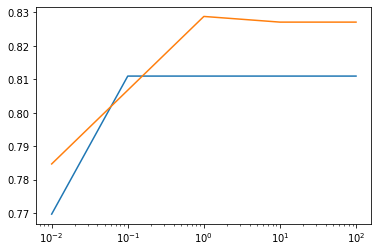

In [ ]:
c=[0.01,0.1,1,10,100]
test_Score=[]
train_Score=[]
for i in c :
  clf=LogisticRegression(C=i)
  clf.fit(X_train,y_train)
  train_Score.append(clf.score(X_train,y_train))
  test_Score.append(clf.score(X_test,y_test))

plt.plot(c,test_Score,label="test Score")
plt.plot(c,train_Score,label="train Score")
plt.xscale('log')


In [ ]:
clf=RidgeClassifier()
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
print(confusion_matrix(y_test,clf.predict(X_test)))

0.8203389830508474
0.8213058419243986
[[153  23]
 [ 29  86]]


In [ ]:
clf.fit(X_train,y_train)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

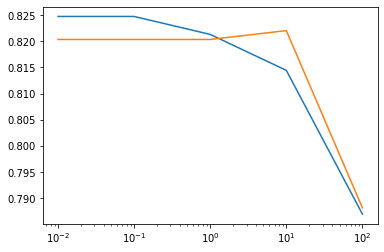

In [ ]:
alpha_=[0.01,0.1,1,10,100] #inverse of C
test_Score=[]
train_Score=[]
for i in alpha_ :
  clf=RidgeClassifier(alpha=i)
  clf.fit(X_train,y_train)
  train_Score.append(clf.score(X_train,y_train))
  test_Score.append(clf.score(X_test,y_test))

plt.plot(alpha_,test_Score,label="test Score")
plt.plot(alpha_,train_Score,label="train Score")
plt.xscale('log')

In [ ]:
clf=SGDClassifier(n_jobs=4)
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
print(confusion_matrix(y_test,clf.predict(X_test)))

0.7677966101694915
0.738831615120275
[[168   8]
 [ 68  47]]


In [ ]:
clf.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=4, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

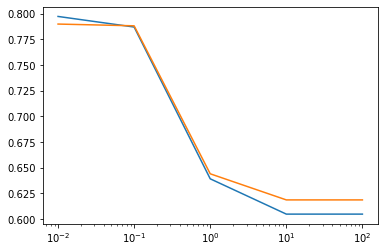

In [ ]:
alpha_=[0.01,0.1,1,10,100] #inverse of C
test_Score=[]
train_Score=[]
for i in alpha_ :
  clf=SGDClassifier(alpha=i)
  clf.fit(X_train,y_train)
  train_Score.append(clf.score(X_train,y_train))
  test_Score.append(clf.score(X_test,y_test))

plt.plot(alpha_,test_Score,label="test Score")
plt.plot(alpha_,train_Score,label="train Score")
plt.xscale('log')

In [ ]:
clf=PassiveAggressiveClassifier(n_jobs=4,C=0.01)
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
print(confusion_matrix(y_test,clf.predict(X_test)))

0.7966101694915254
0.8041237113402062
[[152  24]
 [ 33  82]]


In [ ]:
clf.fit(X_train,y_train)

PassiveAggressiveClassifier(C=0.01, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=4, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

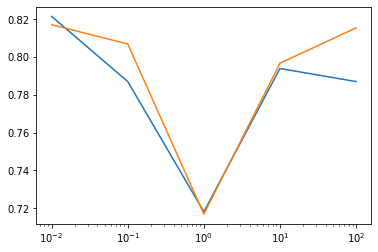

In [ ]:
c=[0.01,0.1,1,10,100]
test_Score=[]
train_Score=[]
for i in c :
  clf=PassiveAggressiveClassifier(C=i)
  clf.fit(X_train,y_train)
  train_Score.append(clf.score(X_train,y_train))
  test_Score.append(clf.score(X_test,y_test))

plt.plot(c,test_Score,label="test Score")
plt.plot(c,train_Score,label="train Score")
plt.xscale('log')

In [ ]:
clf=SVC(C=0.1)
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
print(confusion_matrix(y_test,clf.predict(X_test)))

0.788135593220339
0.7869415807560137
[[148  28]
 [ 34  81]]


In [ ]:
clf.fit(X_train,y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

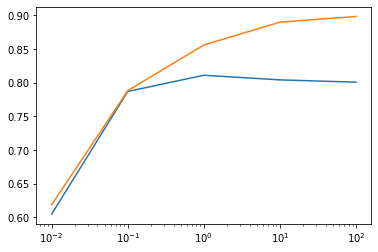

In [ ]:
c=[0.01,0.1,1,10,100]
test_Score=[]
train_Score=[]
for i in c :
  clf=SVC(C=i)
  clf.fit(X_train,y_train)
  train_Score.append(clf.score(X_train,y_train))
  test_Score.append(clf.score(X_test,y_test))

plt.plot(c,test_Score,label="test Score")
plt.plot(c,train_Score,label="train Score")
plt.xscale('log')

In [ ]:
clf=KNeighborsClassifier(n_neighbors=50,n_jobs=4)
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
print(confusion_matrix(y_test,clf.predict(X_test)))

0.7796610169491526
0.7628865979381443
[[161  15]
 [ 54  61]]


In [ ]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=4, n_neighbors=50, p=2,
                     weights='uniform')

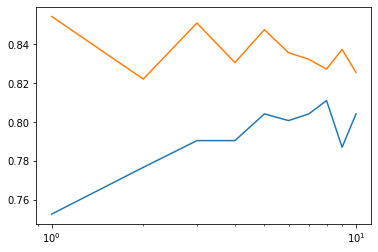

In [ ]:
k=range(1,11)
test_Score=[]
train_Score=[]
for i in k :
  clf=KNeighborsClassifier(n_neighbors=i)
  clf.fit(X_train,y_train)
  train_Score.append(clf.score(X_train,y_train))
  test_Score.append(clf.score(X_test,y_test))

plt.plot(k,test_Score,label="test Score")
plt.plot(k,train_Score,label="train Score")
plt.xscale('log')

In [ ]:
clf=GaussianNB()
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
print(confusion_matrix(y_test,clf.predict(X_test)))

0.7135593220338983
0.7044673539518901
[[104  72]
 [ 14 101]]


In [ ]:
clf.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
print(confusion_matrix(y_test,clf.predict(X_test)))

0.8983050847457628
0.8006872852233677
[[154  22]
 [ 36  79]]


In [ ]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
clf=RandomForestClassifier(n_jobs=4)
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
print(confusion_matrix(y_test,clf.predict(X_test)))

0.8983050847457628
0.7972508591065293
[[153  23]
 [ 36  79]]


In [ ]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

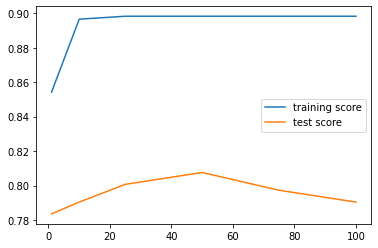

In [ ]:
estimators = [1,10,25,50,75,100]
test_score = []
train_score = []
for n in estimators:
    clf = RandomForestClassifier(n_estimators=n)
    clf.fit(X_train,y_train)
    train_score.append(clf.score(X_train,y_train))
    test_score.append(clf.score(X_test,y_test))

plt.plot(estimators, train_score, label="training score")
plt.plot(estimators, test_score, label="test score")
plt.legend()

In [ ]:
clf=AdaBoostClassifier()
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
print(confusion_matrix(y_test,clf.predict(X_test)))

0.8135593220338984
0.8178694158075601
[[146  30]
 [ 23  92]]


In [ ]:
clf=GradientBoostingClassifier()
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
print(confusion_matrix(y_test,clf.predict(X_test)))

0.8677966101694915
0.8075601374570447
[[156  20]
 [ 36  79]]


In [ ]:
clf.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
print(xgb.score(X_train,y_train))
print(xgb.score(X_test,y_test))
print(confusion_matrix(y_test,xgb.predict(X_test)))

0.8525423728813559
0.8109965635738832
[[157  19]
 [ 36  79]]


In [ ]:
clf.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
clf=QuadraticDiscriminantAnalysis()
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
print(confusion_matrix(y_test,clf.predict(X_test)))

0.7237288135593221
0.6597938144329897
[[144  32]
 [ 67  48]]


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [ ]:
clf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
clf=GaussianProcessClassifier()
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))
print(confusion_matrix(y_test,clf.predict(X_test)))

0.864406779661017
0.8109965635738832
[[158  18]
 [ 37  78]]


In [ ]:
clf.fit(X_train,y_train)

GaussianProcessClassifier(copy_X_train=True, kernel=None, max_iter_predict=100,
                          multi_class='one_vs_rest', n_jobs=None,
                          n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
                          random_state=None, warm_start=False)

# Kfold

In [ ]:
kfold = StratifiedKFold(n_splits=5)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


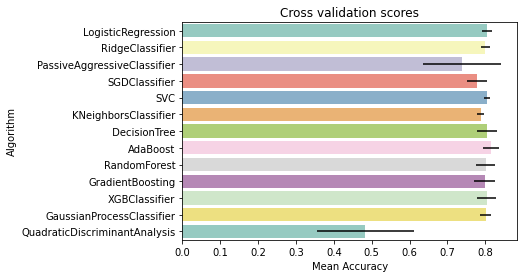

In [ ]:
random_state = 2
classifiers = []
classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(RidgeClassifier(random_state=random_state))
classifiers.append(PassiveAggressiveClassifier(random_state=random_state))
classifiers.append(SGDClassifier(random_state=random_state))
classifiers.append(SVC(random_state=random_state))
classifiers.append(KNeighborsClassifier(n_neighbors=25))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(XGBClassifier(random_state=random_state))
classifiers.append(GaussianProcessClassifier(random_state=random_state))
classifiers.append(QuadraticDiscriminantAnalysis())


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X, y = y, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["LogisticRegression","RidgeClassifier",
                                                                                      "PassiveAggressiveClassifier","SGDClassifier",
                                                                                      "SVC","KNeighborsClassifier",
                                                                                      " DecisionTree","AdaBoost",
                                                                                       "RandomForest","GradientBoosting",
                                                                                      "XGBClassifier","GaussianProcessClassifier",
                                                                                      "QuadraticDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")



# Hyper tuning

### Linear Models

In [ ]:
### LOGISTIC REGRESSION
LG=LogisticRegression()
LG_param_grid = {
                  'C': [0.01,0.1,1, 10, 50, 100,200,300, 1000]}

gsLG = GridSearchCV(LG,param_grid = LG_param_grid,  scoring="accuracy", n_jobs= 4, verbose = 1)

gsLG.fit(X,y)

LG_best = gsLG.best_estimator_

# Best score
print(gsLG.best_score_)
LG_best 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


0.804789419619928


[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:    1.2s finished


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
M

0                        Support Vector Machine
1              Ridge Reression \ Classification
2      Nearest Neighbors\n(k-nearest neighbors)
4                               Decision Trees 
11                  Stochastic Gradient Descent
13                 Passive Aggressive Regressor
17                               Random Forest 
18         XGBoost\n(eXtreme Gradient Boosting)
19                          Logistic Regression
21                            Gradient Boosting
22              Gaussian process classification
23              Quadratic Discriminant Analysis
Name: Model, dtype: object

In [ ]:
#@Ridge Classifier
RC=RidgeClassifier()
RC_param_grid = {
                  'alpha': [0.01,0.1,1, 10, 50, 100,200,300, 1000]}

gsRC = GridSearchCV(RC,param_grid = RC_param_grid,  scoring="accuracy", n_jobs= 4, verbose = 1)

gsRC.fit(X,y)

RC_best = gsRC.best_estimator_

# Best score
print(gsRC.best_score_)
RC_best 

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.8024974319465844


[Parallel(n_jobs=4)]: Done  38 out of  45 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:    0.3s finished


RidgeClassifier(alpha=0.01, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [ ]:
#@SGDC classifier
SGDC=SGDClassifier()
SGDC_param_grid = {
                  'alpha': [0.01,0.1,1, 10, 50, 100,200,300, 1000]}

gsSGDC = GridSearchCV(SGDC,param_grid = SGDC_param_grid,  scoring="accuracy", n_jobs= 4, verbose = 1)

gsSGDC.fit(X,y)

SGDC_best = gsSGDC.best_estimator_

# Best score
print(gsSGDC.best_score_)
SGDC_best

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.7922508988186955


[Parallel(n_jobs=4)]: Done  38 out of  45 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:    0.3s finished


SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
#@PAC classifier
PAC=PassiveAggressiveClassifier()
PAC_param_grid = {
                  'C': [0.01,0.1,1, 10, 50, 100,200,300, 1000]}

gsPAC = GridSearchCV(PAC,param_grid = PAC_param_grid,  scoring="accuracy", n_jobs= 4, verbose = 1)

gsPAC.fit(X,y)

PAC_best = gsPAC.best_estimator_

# Best score
print(gsPAC.best_score_)
PAC_best

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.7979391371340523


[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:    0.3s finished


PassiveAggressiveClassifier(C=0.01, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

### Other Models

In [ ]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf','linear','poly'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X,y)

SVMC_best = gsSVMC.best_estimator_

# Best score
print(gsSVMC.best_score_)
SVMC_best

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 84 candidates, totalling 420 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   19.2s
[Parallel(n_jobs=4)]: Done 420 out of 420 | elapsed:  1.5min finished


0.809322033898305


SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
### KNN classifier
KNN=KNeighborsClassifier()
KNN_param_grid = {
                  'n_neighbors': [1, 2, 3, 4,5,6,7]}

gsKNN = GridSearchCV(KNN,param_grid = KNN_param_grid, n_jobs= 4, verbose = 1)

gsKNN.fit(X,y)

KNN_best = gsKNN.best_estimator_

# Best score
print(gsKNN.best_score_)
KNN_best 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


0.8036337955829482


[Parallel(n_jobs=4)]: Done  35 out of  35 | elapsed:    0.6s finished


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
##DecisionTree
DTC = DecisionTreeClassifier()

param_grid = [{'max_depth':np.arange(1, 16),
              'min_samples_leaf':[1, 5, 10, 20, 50, 100],
             "criterion" : ["gini", "entropy"]}]
gsDTC = GridSearchCV(DTC,param_grid = param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsDTC.fit(X,y)

DTC_best = gsDTC.best_estimator_
print(gsDTC.best_score_)
DTC_best

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:    1.3s


0.8161273754494094


[Parallel(n_jobs=4)]: Done 900 out of 900 | elapsed:    3.6s finished


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
## Ada boost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X,y)

ADA_best = gsadaDTC.best_estimator_
print(gsadaDTC.best_score_)
ADA_best

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 112 candidates, totalling 560 fits


[Parallel(n_jobs=4)]: Done 200 tasks      | elapsed:    1.7s


0.8127182845403185


[Parallel(n_jobs=4)]: Done 560 out of 560 | elapsed:    4.4s finished


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                    

In [ ]:
# Random Forest classifier
RFC = RandomForestClassifier()
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X,y)

RFC_best = gsRFC.best_estimator_

# Best score
print(gsRFC.best_score_)
RFC_best

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   45.3s


0.8150038520801232


[Parallel(n_jobs=4)]: Done 270 out of 270 | elapsed:  1.1min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# GradientBoosting Classifier

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X,y)

GBC_best = gsGBC.best_estimator_

# Best score
print(gsGBC.best_score_)
GBC_best

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   19.5s


0.8036337955829481


[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed:   35.7s finished


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=8,
                           max_features=0.3, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=100, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
#@XBAC CLASSIFIER
XB = XGBClassifier()
XB_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsXB = GridSearchCV(XB,param_grid = XB_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsXB.fit(X,y)

XB_best = gsXB.best_estimator_

# Best score
print(gsXB.best_score_)
XB_best


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   41.4s
[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed:  1.4min finished


0.8047829994863894


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, loss='deviance', max_delta_step=0, max_depth=8,
              max_features=0.3, min_child_weight=1, min_samples_leaf=100,
              missing=None, n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [ ]:
BSs=[gsLG.best_score_,gsRC.best_score_,gsPAC.best_score_,
             gsSGDC.best_score_,gsSVMC.best_score_,gsKNN.best_score_,
             gsDTC.best_score_,gsRFC.best_score_,gsadaDTC.best_score_,
             gsGBC.best_score_,gsXB.best_score_]

In [ ]:
AL=["LogisticRegression","RidgeClassifier","PassiveAggressiveClassifier",
           "SGDClassifier","SVC","KNeighborsClassifier",
          " DecisionTree","RandomForest","AdaBoost",
           "GradientBoosting","XGBClassifier"]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


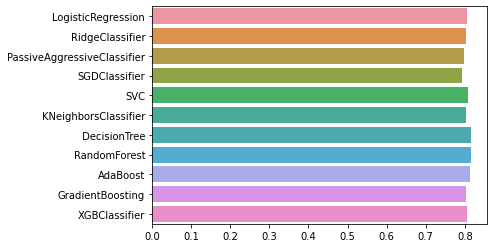

In [ ]:
sns.barplot(BSs,AL)

# Voting

In [ ]:
votingC = VotingClassifier(estimators=[('LG',LG_best),('RC',RG_best),('svc', SVMC_best),('KNN',KNN_best), ('dtc', dtc_best),('rfc', RFC_best),
 ('adac',ada_best),('gbc',GBC_best)], voting='soft', n_jobs=4)

votingC.fit(X, y)
print("train_score_Voting",votingC.score(X_train,y_train))
print("test_Score_Voting",votingC.score(X_test,y_test))

train_score_Voting 0.8711864406779661
test_Score_Voting 0.845360824742268


In [ ]:
votingC.fit(X, y)

VotingClassifier(estimators=[('LG',
                              LogisticRegression(C=1, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('svc',
                              SVC(C=1000, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  de...
                                                         max_leaf_nodes=Non